### error

In [6]:
import osmapi
import xml.etree.ElementTree as ET

# Завантажити дані з файлу .osm
filename = 'monaco-latest.osm'
tree = ET.parse(filename)

In [7]:
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon

# Створити списки для зберігання геометрій і тегів
geometries = []
tags = []

# Перебрати всі елементи з OSM і зберегти геометрію та теги
for element in tree.iter():
    if element.tag == 'node':
        geometries.append(Point(float(element.attrib['lon']), float(element.attrib['lat'])))
    elif element.tag == 'way':
        nodes = [tree.find(f"node[@id='{node.attrib['ref']}']") for node in element.findall('nd')]
        if len(nodes) == 2:
            geometries.append(LineString([(float(node.attrib['lon']), float(node.attrib['lat'])) for node in nodes]))
        else:
            geometries.append(Polygon([(float(node.attrib['lon']), float(node.attrib['lat'])) for node in nodes]))
    elif element.tag == 'relation':
        # ignore relations for now
        continue
    tags.append(element.attrib)

# Створити GeoDataFrame
gdf = gpd.GeoDataFrame(tags, geometry=geometries)

# Переглянути перші 5 рядків GeoDataFrame
print(gdf.head())

ValueError: Length of values (32772) does not match length of index (124761)

### osm

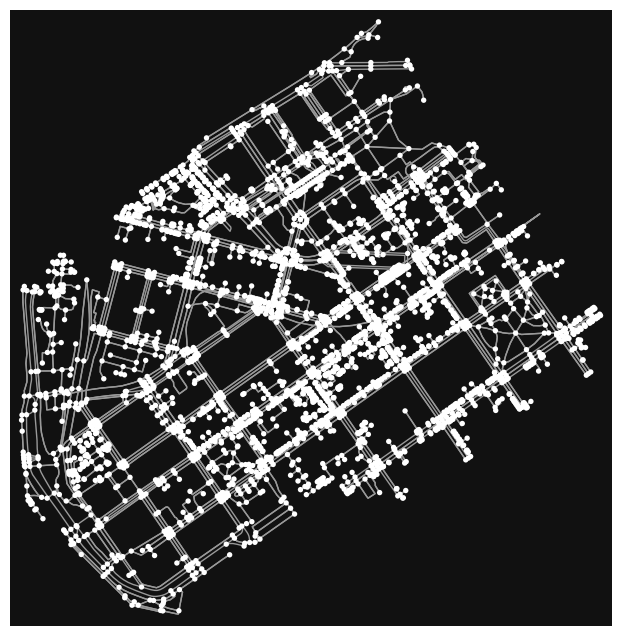

In [7]:
import osmnx
# Вказати місце за допомогою назви місцевості або координат
# PLACE_NAME = "Місто Львів, Україна"
PLACE_NAME = "Kamppi, Helsinki, Finland"

graph = osmnx.graph_from_place(PLACE_NAME)

type(graph)

figure, ax = osmnx.plot_graph(graph)


In [8]:
nodes, edges = osmnx.graph_to_gdfs(graph)
nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
25216594,60.164794,24.921057,5,NaN,NaN,POINT (24.92106 60.16479)
25238874,60.163665,24.921028,4,NaN,NaN,POINT (24.92103 60.16366)
25238883,60.163452,24.921441,4,crossing,NaN,POINT (24.92144 60.16345)
25238933,60.161114,24.924529,3,NaN,NaN,POINT (24.92453 60.16111)
25238937,60.160860,24.925861,3,NaN,NaN,POINT (24.92586 60.16086)


### CSV

<AxesSubplot:>

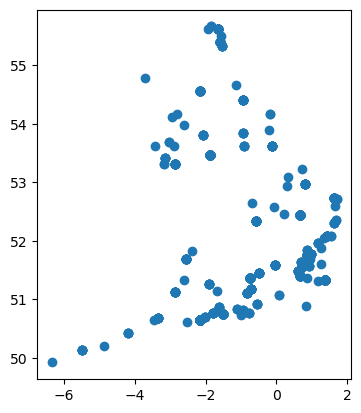

In [13]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from lat_lon_parser import parse

# Зчитування даних з файлу CSV за допомогою pandas
df = pd.read_csv('Special_Protection_Areas_England_5554873973169587489.csv')

# Створення геометрії точок на основі координат
# [print((parse(x),parse(y))) for x,y in zip(df['LONGITUDE'], df['LATITUDE'])]
geometry = [Point((parse(x),parse(y))) for x,y in zip(df['LONGITUDE'], df['LATITUDE'])]

# Створення GeoDataFrame на основі pandas DataFrame та геометрії точок
gdf = gpd.GeoDataFrame(df, crs='EPSG:4326', geometry=geometry)

# Візуалізація GeoDataFrame
gdf.plot()

### .las - .laz

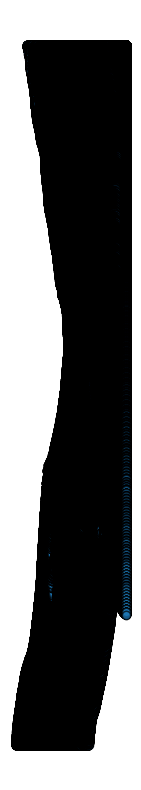

In [1]:
import laspy
import geopandas as gpd
from shapely.geometry import Point

# Відкриття файла .laz
inFile = laspy.file.File("490000_4037000.laz", mode="r")

# Створення GeoDataFrame
points = gpd.GeoDataFrame()

# Створення стовпців даних в GeoDataFrame
points['X'] = inFile.X
points['Y'] = inFile.Y
points['Z'] = inFile.Z

# Створення геометрій з координат X та Y
points['geometry'] = [Point(x, y) for x, y in zip(points.X, points.Y)]

# Задання системи координат GeoDataFrame
points.crs = 'EPSG:4326'

# Візуалізація на мапі
ax = points.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ax.set_axis_off()